In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
a = 4.2
b = 1.1
noise = 0.5
x = np.arange(-5.0,5.0,0.1)
y = a * x + b + np.random.normal(size=x.shape,scale=noise)

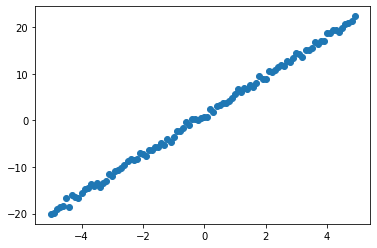

In [52]:
plt.figure()
plt.scatter(x,y)
plt.show()

In [53]:
G = np.column_stack((x.T, np.ones(x.shape).T))

In [54]:
np.linalg.solve(G.T @ G , G.T @ y)

array([4.21136358, 1.13145182])

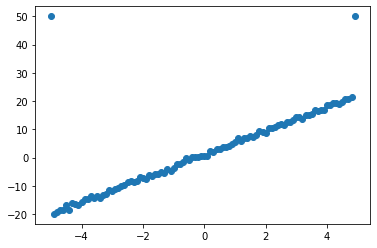

In [67]:
y[0] = 50
y[99] = 50
plt.figure()
plt.scatter(x,y)
plt.show()

In [68]:
np.linalg.solve(G.T @ G , G.T @ y)

array([3.95964947, 2.09603776])

In [69]:
from sklearn import svm
s = svm.LinearSVR()
s.fit(x.reshape(-1,1),y)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [73]:
print(s.coef_)
print(s.intercept_)

[4.20441471]
[1.15296198]
